# Morphological Transformations

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [11]:
# Create a 9x9 kernel, can also use np.ones()
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))

# Some morphology operators
# https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html 
# https://docs.opencv.org/3.4/d3/dbe/tutorial_opening_closing_hats.html
    

In [12]:
def remove_shadows(img):
    # Generate the shadow of the image
    # Create a 9x9 kernel, can also use np.ones()
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))

    # Some morphology operators
    # https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html 
    # https://docs.opencv.org/3.4/d3/dbe/tutorial_opening_closing_hats.html
    shadow = cv2.dilate(img, kernel) # Make the background bleed into the text to cover it up

    # Filtering
    # https://docs.opencv.org/3.4/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html
    shadow = cv2.medianBlur(shadow, 21) # Use a median filter to cover up the text entirely (there may still be particles in the text), now we have an image with only the shadow

    res = 255 - cv2.absdiff(img, shadow) # Remove the shadow from the original image
    return res

In [13]:
def adaptive_clean(img_path, load=True, mode='otsu'):
    # Load image
    if load:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE).astype(np.uint8)
    else:
        img = img_path

    # Convert to grayscale and apply Otsu's binarization for noise reduction
    # https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html
    img = cv2.GaussianBlur(img,(5,5),0)
    if mode == 'otsu':
        _, img = cv2.threshold(img,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    # or you can use gaussian/mean adaptive thresholding
    elif mode == 'mean':
        img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
    elif mode == 'gaussian':
        img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

    img = 255 - img

    # Can also apply some morphological transformations
    # https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html
    kernel = np.ones((3, 3), dtype=np.uint8) # or you can use cv2.getStructuringElement()
    img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    return img


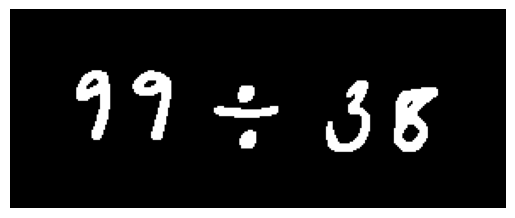

In [14]:
img = cv2.imread('../equation-dataset/dark-background/5.png', cv2.IMREAD_GRAYSCALE).astype(np.uint8)
# img = cv2.imread('../equation-dataset/03_eq.png', cv2.IMREAD_GRAYSCALE).astype(np.uint8)
img = remove_shadows(img)

# As long as the lines aren't thick, we can remove the background lines
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
img = cv2.erode(img, kernel, iterations=1)

img = adaptive_clean(img, load=False)

plt.axis('off')
plt.imshow(img, cmap='gray')

# Example pipeline

In [18]:
def clean_image(img_path, load=True):
    if load:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE).astype(np.uint8)
    else:
        img = img_path

    # img = cv2.GaussianBlur(img, (3, 3), 0)
    img = remove_shadows(img)

    # As long as the lines aren't thick, we can remove the background lines
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    img = cv2.erode(img, kernel, iterations=1)

    img = adaptive_clean(img, load=False)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    img = cv2.erode(img, kernel, iterations=1)

    return img

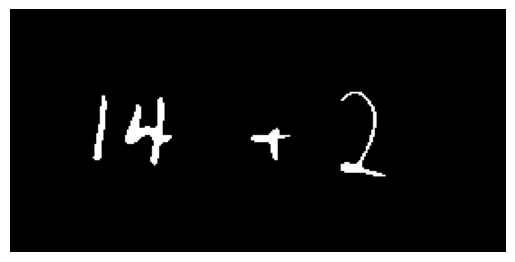

In [19]:
img = clean_image('../equation-dataset/dark-background/1.png', load=True)
plt.axis('off')
plt.imshow(img, cmap='gray')

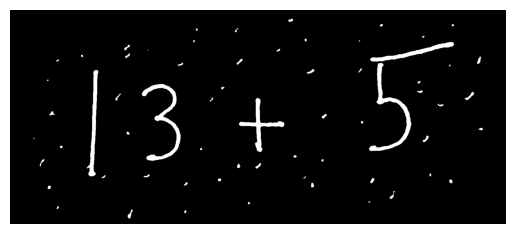

In [17]:
img = clean_image('../equation-dataset/01_eq.png', load=True)
plt.axis('off')
plt.imshow(img, cmap='gray')
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)